In [7]:
'''Import necessary libraries, classes 
and functions from model.py and utils.py'''
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import *
from model import *
import matplotlib.pyplot as plt

In [8]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [9]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [10]:
#load train and test data of MNIST
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [11]:
# dataloader arguments
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

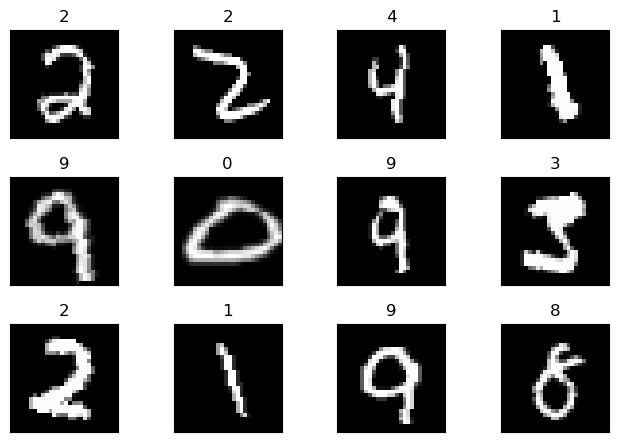

In [12]:
# Visualize some of the training data in batches

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [13]:
# Using Mac M1 GPU to run the model
use_mps = torch.backends.mps.is_available()
device = torch.device("mps:0" if use_mps else "cpu")
# Calling the network class from model.py and printing the summary
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [14]:
# Using SGD optimizer with momentum and StepLR scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# Using CrossEntropyLoss as the loss function
criterion = nn.CrossEntropyLoss()
num_epochs = 20
# Training and testing the model
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, nn.CrossEntropyLoss(reduction='sum'))
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3148 Batch_id=117 Accuracy=56.80: 100%|██████████| 118/118 [00:14<00:00,  8.29it/s]


Test set: Average loss: 0.2082, Accuracy: 9407/10000 (94.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0538 Batch_id=117 Accuracy=94.47: 100%|██████████| 118/118 [00:13<00:00,  9.02it/s]


Test set: Average loss: 0.0777, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0649 Batch_id=117 Accuracy=96.47: 100%|██████████| 118/118 [00:12<00:00,  9.08it/s]


Test set: Average loss: 0.0691, Accuracy: 9783/10000 (97.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0974 Batch_id=117 Accuracy=97.19: 100%|██████████| 118/118 [00:13<00:00,  8.92it/s]


Test set: Average loss: 0.0482, Accuracy: 9853/10000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0673 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [00:12<00:00,  9.18it/s]


Test set: Average loss: 0.0435, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0408 Batch_id=117 Accuracy=97.94: 100%|██████████| 118/118 [00:12<00:00,  9.18it/s]


Test set: Average loss: 0.0442, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0421 Batch_id=117 Accuracy=98.09: 100%|██████████| 118/118 [00:12<00:00,  9.15it/s]


Test set: Average loss: 0.0327, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0722 Batch_id=117 Accuracy=98.32: 100%|██████████| 118/118 [00:13<00:00,  9.03it/s]


Test set: Average loss: 0.0306, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0085 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:12<00:00,  9.17it/s]


Test set: Average loss: 0.0300, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0293 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:12<00:00,  9.14it/s]


Test set: Average loss: 0.0289, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1183 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:12<00:00,  9.19it/s]


Test set: Average loss: 0.0305, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0149 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:13<00:00,  9.02it/s]


Test set: Average loss: 0.0245, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0154 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:12<00:00,  9.21it/s]


Test set: Average loss: 0.0310, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0799 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:12<00:00,  9.17it/s]


Test set: Average loss: 0.0300, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0200 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:12<00:00,  9.22it/s]


Test set: Average loss: 0.0241, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0293 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:12<00:00,  9.09it/s]


Test set: Average loss: 0.0216, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1520 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:12<00:00,  9.16it/s]


Test set: Average loss: 0.0210, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0465 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [00:13<00:00,  9.07it/s]


Test set: Average loss: 0.0212, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0240 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:12<00:00,  9.13it/s]


Test set: Average loss: 0.0217, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0121 Batch_id=117 Accuracy=99.25: 100%|██████████| 118/118 [00:12<00:00,  9.09it/s]


Test set: Average loss: 0.0208, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.


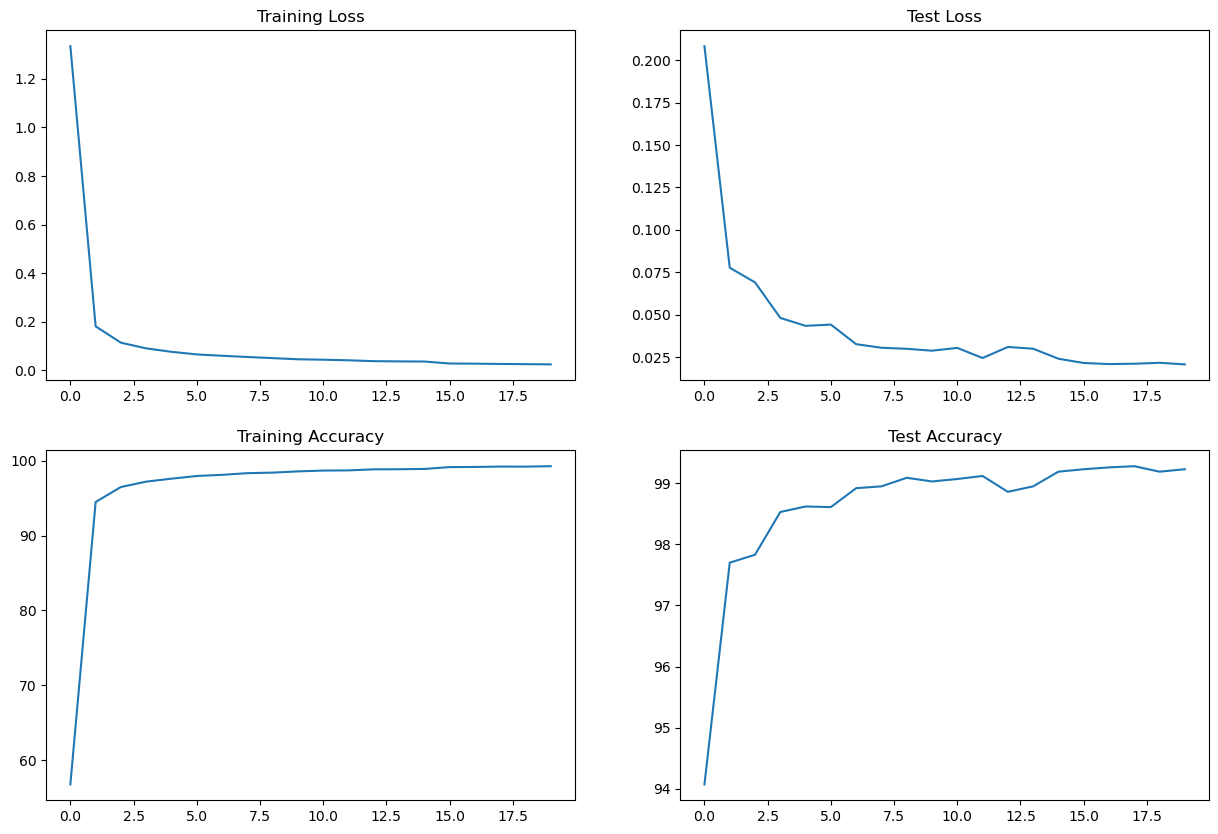

In [15]:
plt_fig(train_losses,train_acc,test_losses,test_acc)